In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

ModuleNotFoundError: No module named 'masquer'

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# CHAPITRE 3 - Les Tris

Afin de pouvoir étudier les différents tris, nous allons utiliser différentes fonctions:

- Une fonction de **mélange** des données
- Une fonction qui **trace** le temps mis par la fonction pour trier en fonction de la taille des données

In [24]:
# Les deux fonctions suivantes ne font rien, 
# elles sont juste des modèles de fonctions de complexité linéaire et quadratique

# Fonction de tes en complexité linéaire
def f1(L):
    for i in L:
        a = 1
    return

# Fonction de test en complexité quadratique
def f2(L):
    for i in L:
        for j in L:
            a = 1
    return

### Activité à réaliser
1. Programmer une fonction **melange** qui prend comme argument **deux entiers n et p** et qui renvoie un tableau des entiers de 1 à n pour lequel on a réalisé p permutations entre des positions aléatoires.

In [47]:
# 1.
from random import randint
def melange(n, p):
    """Renvoie un tableau des entiers de 1 à n pour lequel on a réalisé p permutations entre des positions aléatoires.
    n et p doivent être des entiers."""
    assert type(n) == int, "n doit être un entier."
    assert n >= 0, "n doit être positif."
    assert type(p) == int, "p doit être un entier."
    assert p > 0, "p doit être supérieur à 0."
    rep = [i for i in range(1, n+1)]
    for i in range(p):
        rand1 = randint(0, len(rep)-1)
        rand2 = randint(0, len(rep)-1)
        while rand1 == rand2:
            rand2 = randint(0,len(rep)-1)
        rep[rand1], rep[rand2] = rep[rand2], rep[rand1]
    return rep

print(melange(100, 100))

[50, 2, 13, 18, 22, 29, 53, 8, 35, 10, 62, 1, 76, 81, 89, 37, 27, 6, 52, 85, 38, 32, 56, 41, 98, 63, 97, 94, 34, 48, 33, 72, 74, 87, 19, 45, 26, 7, 5, 92, 88, 15, 69, 44, 42, 9, 17, 25, 4, 82, 65, 77, 20, 3, 55, 80, 90, 16, 100, 79, 64, 51, 36, 68, 11, 66, 47, 31, 57, 12, 30, 60, 49, 24, 75, 28, 43, 78, 59, 40, 21, 70, 96, 54, 95, 14, 86, 46, 73, 84, 91, 58, 71, 23, 39, 83, 61, 67, 99, 93]


Voici ci-dessous une fonction **trace** qui permet d'afficher le temps d'exécution d'une fonction en fonction de la taille de la liste d'entrée.
2. Commentez et documentez cette fonction

In [35]:
import matplotlib.pyplot as plt
from time import *

def trace(f, n, p):
    """Trie à l'aide de la fonction f une liste d'entiers de 0 à n permutés p fois.
    f doit être une fonction de tri.
    n et p doivent être des entiers."""
    assert type(n) == int, "n doit être un entier."
    assert n >= 0, "n doit être positif."
    assert type(p) == int, "p doit être un entier."
    assert p > 0, "p doit être supérieur à 0."
    L = melange(n, p) #Utilisation de la fonction melange précedemment créée
    listes = [L[:(i*n)//16] for i in range(1,17)] #Création de 16 listes de tailles différentes
    x = [(i*n)//16 for i in range(1,17)] #stockage de la longueur des listes
    y = []
    for i in range(16):
        temps = 0
        for j in range(5): #Faire 5 fois la fonction et mesurer le temps total d'exécution
            l = listes[i][:]
            t = time()
            f(l)
            temps += time() -t
        temps = temps / 5 #Prendre le temps d'exécution moyen
        y.append(temps)
    plt.plot(x,y,"+")
    plt.show()

3. Testez la sur les fonction f1 et f2 de test pour des valeurs de n et p bien choisies. Il faut qu'elles soient assez grandes pour que l'on puisse voir l'effet de la complexité (notion limite) mais adaptées à cette complexité. 

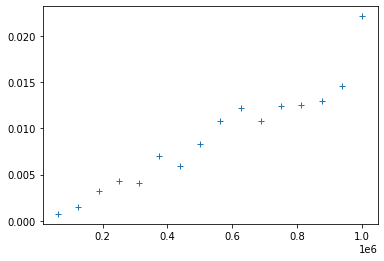

In [31]:
# 3. sur f1
trace(f1, 1000000, 10)

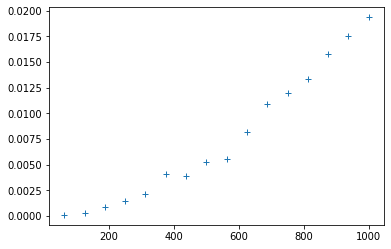

In [27]:
# 3. sur f2
trace(f2, 1000, 10)

4. Testez alors le triinsertion précédent dans le cas de données très mélangées et peu mélangées

In [32]:
def tri_insert(L):
    for i in range(len(L)):
        j = i
        while j > 0 and L[j-1] > L[j]:
            L[j-1], L[j] = L[j], L[j-1]
            j = j - 1
    return L

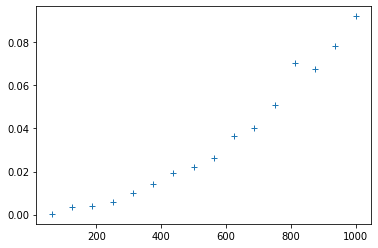

In [45]:
# 4. sur une liste bien mélangée
trace(tri_insert, 1000, 1000)

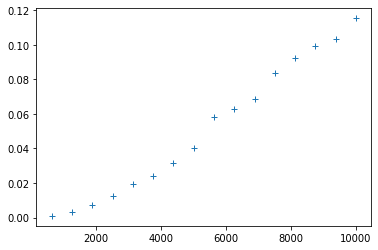

In [46]:
# 4.sur une liste peu mélangée
trace(tri_insert, 10000, 50)

In [80]:
def insert_di(L, element, index=0):
    if index == 0: index = len(L)//2
    if len(L) <= 1:
        print(index)
        return index
    if element >= L[-len(L)//2]:
        index += len(L)//2
        return insert_di(L[-len(L)//2:], element, index=index)
    else:
        index -= len(L)//2
        return insert_di(L[:-len(L)//2], element, index=index)

def tri(L):
    rep = []
    for i in range(len(L)):
        rep.insert(insert_di(rep, L[i]), L[i])
    return rep

tri([2,6,5,3,4,9,1,8,7])

0
0
2
1
3
6
0
7
7


[1, 6, 3, 2, 4, 5, 9, 7, 8]